#### Hotel_Booking_Dataset_Analysis

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

In [2]:
hotel_data = pd.read_csv("C:/hotel booking/hotel_bookings.csv")
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


이런 csv형태의 데이터는 데이터의 구조상에 있어서 빈틈을 없애주는 등의 과정이 매우 중요하다.

예를 들면 다른 데이터보다 개수가 적거나 NaN의 형태로 구성되어있는 부분들은 없애주어야 한다.

In [3]:
print("Nan in each columns" , hotel_data.isna().sum(), sep='\n')

Nan in each columns
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16

country, agent, company의 정보에 비어있는 정보가 각각 488, 16340, 112593개씩 존재하는데, 이중에서 제일 정보 부족의 개수가 많은 company의 정보를 .drop()을 이용해 데이터에서 제거하고자 한다.

In [4]:
hotel_data = hotel_data.drop(['company'], axis = 1)
hotel_data = hotel_data.dropna(axis = 0)

이제 하나의 행이 제거되었으니 총 31개의 행이 남아있는데, .unique() 함수를 이용하면 숫자형 범주의 데이터가 아닌 경우에 데이터의 구성을 보여준다. 이 값들을 숫자형으로 바꾸어주는 방법에는 대표적으로 2개가 존재하는데, 예를 들면 'hotel'의 데이터의 City Hotel을 1로, Resort Hotel을 0으로 바꿔주고자 할 때
1. hotel_data['hotel'] = hotel_data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})


2. from sklearn import preprocessing

   label_encoder = preprocessing.LabelEncoder() 
   
   hotel_data['hotel'] = label_encoder.fit_transform(hotel_data['hotel'])
   
이 두가지 방법이 존재한다.
   

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

hotel_data['hotel'] = label_encoder.fit_transform(hotel_data['hotel'])
hotel_data['customer_type']= label_encoder.fit_transform(hotel_data['customer_type']) 
hotel_data['assigned_room_type'] = label_encoder.fit_transform(hotel_data['assigned_room_type'])
hotel_data['deposit_type'] = label_encoder.fit_transform(hotel_data['deposit_type'])
hotel_data['reservation_status'] = label_encoder.fit_transform(hotel_data['reservation_status'])
hotel_data['meal'] = label_encoder.fit_transform(hotel_data['meal'])
hotel_data['country'] = label_encoder.fit_transform(hotel_data['country'])
hotel_data['distribution_channel'] = label_encoder.fit_transform(hotel_data['distribution_channel'])
hotel_data['market_segment'] = label_encoder.fit_transform(hotel_data['market_segment'])
hotel_data['reserved_room_type'] = label_encoder.fit_transform(hotel_data['reserved_room_type'])
hotel_data['reservation_status_date'] = label_encoder.fit_transform(hotel_data['reservation_status_date'])
hotel_data['arrival_date_month'] = label_encoder.fit_transform(hotel_data['arrival_date_month'])

일일히 이렇게 해주는 것이 좀 귀찮기는 했는데 for문을 이용해서 구하려고 해도 뾰족한 방법이 떠오르지가 않았다.

In [6]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  int32  
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  int32  
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

In [7]:
hotel_data['is_canceled'].value_counts()
hotel_data['hotel'].value_counts()

0    71181
1    31713
Name: hotel, dtype: int64

#### 0. 훈련 개요

이 데이터는 미국의 hotel booking과 관련된 데이터이다.

이번 데이터를 분석하는 목적은 kaggle에서 task로 선정된 부분에 대한 답을 찾기 위해서인데, 특정 신청자의 정보가 주어졌을 때 이 사람이 예약을 취소 할지 안할지의 여부를 예측하는 것이 목적이다.

따라서 분류 class가 0(취소), 1(취소안함)으로 2개로 나누어지게 될것이기 때문에 지도 학습을 통해 '분류'모델을 사용하면 될 것이다.

1. logistic regression, Linear Regression, Lasso, Ridge의 4가지 분류기로 학습을 시킨 뒤에 ensemble의 한 종류인 VotingClassifier로 예측을 하고,

2. 두번째로는 신경망의 기본 중 하나인 DNN으로 학습을 시켜 두 방법의 정확도를 비교해 보고자 한다.

다양한 정보들이 제공되는데, 이중 상관 계수가 높은 정보들만을 골라서 학습에 사용할 것이기 때문에 우선 정보들과 취소 여부를 시각화하기로 한다.



#### 1. 데이터 구조 훑어보기

In [8]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  int32  
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  int32  
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

.describe() 메서드는 숫자형 특성의 요약 정보만을 보여주기 때문에 밑에 나오는 데이터는 전부 숫자형이다.

이 숫자형 데이터들을 히스토그램으로 특성마다 나타내고자 한다.

In [9]:
hotel_data.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,...,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.308210,0.390314,111.740092,2016.156977,5.465032,27.339155,15.786771,0.978181,2.589655,1.899926,...,0.201780,0.122631,86.545532,2.619579,2.116654,104.679911,0.053035,0.605458,0.629181,513.043589
std,0.461756,0.487823,107.681013,0.706117,3.553446,13.279990,8.794042,1.003991,1.905941,0.490891,...,0.624954,0.329434,110.714259,18.797440,0.590903,50.021697,0.225359,0.799342,0.502803,229.705649
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,26.000000,2016.000000,2.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,9.000000,0.000000,2.000000,73.000000,0.000000,0.000000,0.000000,332.000000
50%,0.000000,0.000000,79.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,14.000000,0.000000,2.000000,96.300000,0.000000,0.000000,1.000000,517.000000
75%,1.000000,1.000000,169.000000,2017.000000,8.000000,38.000000,24.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,229.000000,0.000000,2.000000,127.800000,0.000000,1.000000,1.000000,710.000000
max,1.000000,1.000000,629.000000,2017.000000,11.000000,53.000000,31.000000,16.000000,41.000000,26.000000,...,18.000000,2.000000,535.000000,391.000000,3.000000,5400.000000,3.000000,5.000000,2.000000,922.000000


In [10]:
hotel_data['previous_cancellations'].value_counts()

0     97339
1      5384
2        36
26       26
25       25
11       25
24       24
14       14
3         9
6         6
13        4
21        1
5         1
Name: previous_cancellations, dtype: int64

데이터를 가시화해서 보니 정규분포 모양처럼 고르게 퍼지지 않은 데이터의 경우 분석에 별 도움이 되지 않을 것 같아서 불필요한것은 제거하거나 나중에 종모양이 되도록 바꾸는 과정을 거쳐보기로 하자.

이제 object형태의 데이터가 없으니 모든 데이터가 히스토그램으로 변형이 가능한 상태이다.

학습을 하기 위해 'previous_cancelations'의 값을 바탕으로 'is_canceled'의 값을 예측해 줄 것이기 때문에 계층적 샘플링(stratified sampling)을 진행해줄 예정이다.

우선 pd.cut() 함수를 사용해서 카테고리를 3개를 가진 특성으로 나누어서 csv데이터셋에 추가해보고자 한다.

In [11]:
hotel_data['previous_cancellations_cat'] = pd.cut(hotel_data['previous_cancellations'],
                                                 bins = [-1,0, 1, 15,26., np.inf],
                                                 labels = [1,2,3,4,5])
hotel_data['previous_cancellations_cat'].value_counts()

1    97339
2     5384
3       95
4       76
5        0
Name: previous_cancellations_cat, dtype: int64

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)
for train_index, test_index in split.split(hotel_data, hotel_data['previous_cancellations_cat']):
    train_set = hotel_data.iloc[train_index].values
    strat_train_set = hotel_data.iloc[train_index]
    strat_test_set = hotel_data.iloc[test_index]
    test_set = hotel_data.iloc[test_index]
strat_train_set['previous_cancellations_cat'].value_counts()

1    77871
2     4307
3       76
4       61
5        0
Name: previous_cancellations_cat, dtype: int64

이렇게 비슷한 비율로 샘플링이 마무리 되었음을 확인할 수 있다.

그런데 처음에는 .loc()으로 했더니 pandas2.0이 지원하지 않는 버전이어서 .iloc()으로 바꿔주었더니 원하는대로 진행이 되었다.

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('previous_cancellations_cat', axis = 1)

#### 2. 테스트 세트 분리

아래와 같은 코드를 실행해 주면 우리가 예측해야 하는 'is_canceled'의 정보가 담긴 것을 y값으로, 그것 제외 나머지 정보가 모두 x에 들어가게 된다.

In [14]:
hotel_train = strat_train_set.copy()
hotel_test = strat_test_set.copy()
from sklearn.model_selection import train_test_split
x_train = hotel_train.drop(['is_canceled'], axis = 1)
y_train = hotel_train['is_canceled']
x_test = hotel_test.drop(['is_canceled'], axis = 1)
y_test = hotel_test['is_canceled']

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
def plot_learning_curves(model, x,y):
    train_error, val_error = [],[]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
    for i in range(1, len(x_train)):
        model.fit(x_train[:i], y_train[:i])
        y_train_pred = model.predict(x_train[:i])
        y_val_pred = model.predict(x_test)
        train_error.append(mean_squared_error(y_train[:i], y_train_pred))
        val_error.append(mean_squared_error(y_test, y_val_pred))
    plt.plot(np.sqrt(train_error), 'r-+', label = 'train')
    plt.plot(np.sqrt(val_error), 'b-', label = 'val')
        

#### 3-1. Linear Regression으로 학습

Linear Regression(단순 선형 회귀 모델)에는

sklearn.linear_model.LinearRegression( 분석할 자료, fit_intecept = True, normalize = False, copy_x = True, n_jobs = None)

의 값을 지정할 수가 있는데 fit_intercept는 이 모델의 intercept를 계산할지 말지의 여부이고 normalize는 fit_intercetp == True일때만 의미 있는데 x값을 (x-x average)/(x의 표본분산)으로 계산할지 말지 여부를 결정한다.



In [17]:
train_set[:,17].reshape(-1,1)[:2].reshape(-1,1)

array([[0],
       [0]], dtype=object)

In [18]:
np.array(train_set[:,2:]).shape

(82315, 30)

In [19]:
np.array(train_set[:,1]).reshape(-1,1)[0]

array([0], dtype=object)

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

print('Mean Squared Error_lin_reg:', np.sqrt(mean_squared_error(y_test, y_pred)).round(3))
print('Score_lin_reg_train:', lin_reg.score(x_test, y_test).round(10))
print('Score_lin_reg_test:', lin_reg.score(x_train, y_train).round(10))

Mean Squared Error_lin_reg: 0.181
Score_lin_reg_train: 0.8619567128
Score_lin_reg_test: 0.8585022191


Logistic Regression도 마찬가지로 회귀 알고리즘이다.

선형 회귀모델처럼 입력 특성의 가중치의 합을 계산하고 편향을 더하는 방법으로 확률을 추정한다. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 'logistic'을 출력하는 방법을 선택한다. 

로지스틱 회귀 모델은 1/(1+e^-x)의 형태를 띄는, 0과 1사이의 값을 출력해주는 sigmoid 함수를 이용한다. sigmoid값이 0.5이상이면 1을, 미만이면 0을 출력한다.

위와 같은 방법으로 확률을 추정하고 예측하며, 훈련 방법의 경우에는 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 반대로 한다. 비용함수로는 양성 샘플은 -log(p)를 , 음성은 -log(1-p)를 이용해서 비용의 값을 점점 0에 가까워지도록 한다.

처음에는 penalty의 값으로  'lbfgs'를 이용했는데 그렇게 하니까 메모리상 문제가 있어서 'liblinear'으로 바꿔주었다.

그리고 회귀를 진행할 때에 웬만해서는 preprocessing과정을 이용해서 데이터의 수치를 0과 1사이의 값으로 만들었어야 하는데 그렇게 하지 못했어서 sklearn의 preprocessing함수를 이용하였다.

마지막에 .score()으로 도출하는 값은 각 샘플에 대해 계산한 예측 오차를 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 낸 평균이다.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(preprocessing.scale(x_train), y_train)
y_prd = log_reg.predict(x_test)

print('Mean Squared Error_log_reg:', np.sqrt(mean_squared_error(y_test, y_prd)).round(3))
print('Score_log_reg_train:', log_reg.score(x_train, y_train).round(10))
print('Score_log_reg_test:', log_reg.score(x_test, y_test).round(10))

Mean Squared Error_log_reg: 0.785
Score_log_reg_train: 0.3917997935
Score_log_reg_test: 0.3843724185


#### 3-3. Ridge+Lasso로 학습

지금 학습을 진행할 분류기인 ridge와 lasso 모두 규제가 있는 선형 모델이다.

이는 사실 SGDregression을 이용할떄 SGDRegressor(penalty = 'l2')로 설정해 주면 이게 바로 ridge regression이다.

'l2'라는 'penalty', 즉 규제가 비용 함수에 가중치 벡터의 l2노름의 제곱을 2로 나눈 규제항을 추가하게 되게 때문이다. 

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1, solver = 'cholesky')
ridge.fit(x_train, y_train)
y_prd = ridge.predict(x_test)

print('Mean Squared Error_ridge:', np.sqrt(mean_squared_error(y_test, y_prd)).round(3))
print('Score_ridge_train:', ridge.score(x_train, y_train).round(10))
print('Score_ridge_test:', ridge.score(x_test, y_test).round(10))

Mean Squared Error_ridge: 0.181
Score_ridge_train: 0.8585022164
Score_ridge_test: 0.8619562391


In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train) 

y_prd = lasso.predict(x_test)

print('Mean Squared Error_lasso:', np.sqrt(mean_squared_error(y_test, y_prd)).round(3))
print('Score_lasso_train:', lasso.score(x_train, y_train).round(10))
print('Score_lasso_test:', lasso.score(x_test, y_test).round(10))

Mean Squared Error_lasso: 0.285
Score_lasso_train: 0.6550240305
Score_lasso_test: 0.6561994692


#### 3-4. DecisionTreeRegressor로 학습

Decision Tree Regressor은 회귀 결정 트리인데, 학습 결과 오차가 0이 나와버렸다. 과대적합된 모양인데, 아마도 데이터의 수준에 비해 너무 강력한 분류기였던 모양이다.

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth =2, min_samples_leaf = 10)
tree_reg.fit(x_train, y_train)

y_prd = tree_reg.predict(x_test)

print('Mean Squared Error_treereg:', np.sqrt(mean_squared_error(y_test, y_prd)).round(3))
print('Score_treereg_train:', tree_reg.score(x_train, y_train).round(10))
print('Score_treereg_test:', tree_reg.score(x_test, y_test).round(10))

Mean Squared Error_treereg: 0.0
Score_treereg_train: 1.0
Score_treereg_test: 1.0


#### Sequential Dense Model로 학습

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_shape = (65,), units = 30, activation = 'relu'))
model.add(tf.keras.layers.Dense(60, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1980      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                1860      
_________________________________________________________________
batch_normalization (BatchNo (None, 60)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 122       
Total params: 4,202
Trainable params: 4,082
Non-trainable params: 120
_________________________________________________________________


In [27]:
adam_optimizer = tf.keras.optimizers.Adam(lr = 0.0001)
model.compile(
    loss = 'sparse_categorical_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy']
)

In [33]:
data_x = preprocessor.fit_transform(x)
x_tr, x_te, y_tr, y_te = train_test_split(data_x, y, test_size = 0.2)
y_tr = np.array(y_tr)
y_te = np.array(y_te)
x_tr.shape, x_te.shape

((95512, 65), (23878, 65))

In [34]:
history = model.fit(x_tr, y_tr, validation_split = 0.2, epochs = 30)

Train on 76409 samples, validate on 19103 samples
Epoch 1/30
76409/76409 [==============================] - 19s 252us/sample - loss: 0.6185 - accuracy: 0.6476 - val_loss: 0.5925 - val_accuracy: 0.6732
Epoch 2/30
76409/76409 [==============================] - 15s 196us/sample - loss: 0.5872 - accuracy: 0.6807 - val_loss: 0.5556 - val_accuracy: 0.7207
Epoch 3/30
76409/76409 [==============================] - 13s 170us/sample - loss: 0.5293 - accuracy: 0.7417 - val_loss: 0.4907 - val_accuracy: 0.7634
Epoch 4/30
76409/76409 [==============================] - 12s 154us/sample - loss: 0.4831 - accuracy: 0.7720 - val_loss: 0.4560 - val_accuracy: 0.7917
Epoch 5/30
76409/76409 [==============================] - 12s 158us/sample - loss: 0.4630 - accuracy: 0.7836 - val_loss: 0.4536 - val_accuracy: 0.7895
Epoch 6/30
76409/76409 [==============================] - 12s 163us/sample - loss: 0.4546 - accuracy: 0.7883 - val_loss: 0.4433 - val_accuracy: 0.7965
Epoch 7/30
76409/76409 [====================

In [ ]:
model.evaluate(x_te, y_te)

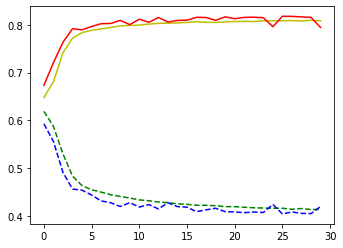

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'g--', label = 'loss')
plt.plot(history.history['val_loss'], 'b--', label = 'val_loss')
plt.plot(history.history['accuracy'], 'y-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label = 'val_accuracy')
plt.xlabel = 'Epoch'
plt.show()

### Accuracy = 79.19%

#### 직접 sequential model을 만드는 것은 일단 model.fit()을 할 때에 계속 input shape가 맞지 않았었다. 일반적인 DNN으로 해결해 보고 싶었는데 계속 기본적인데에서 문제가 발생했다.

#### 알고 보니 문제는 입력하는 자료가 pandas dataset이었고, model.fit을 할 때에는 np.array값만을 적용할 수 있었다.

따라서 밑에서 만든 pipeline을 이용해서 형태를 바꾸었으며 문자형 자료또한 모두 바꿔 주었다.

preprocessing 을 하기 전에 이용한 데이터는 y값은 우리가 예측 하여야 하는 취소 여부, 즉 hotel_data['is_canceled']이고 x값은 hotel_data.drop('is_canceled', axis = 1)[features]였다.

중요한 것은 x와 y의 datapreprocessing을 먼저 한 뒤에 test/train을 나눠야 하며, 나눌때에 x_train, x_test, y_train, y_test의 순서임을 잊지 말자.

### Pipeline 만들어서 데이터 분석하기

In [30]:
dataframe = pd.read_csv("C:/hotel booking/hotel_bookings.csv")

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
#숫자형 자료의 label, 문자형 자료의 label각각을 직접 따로 list에 저장해준다.

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]


features = num_features + cat_features

x = dataframe.drop(["is_canceled"], axis=1)[features]
y = dataframe["is_canceled"]

#숫자형 데이터를 보완한다.
#date자료의 경우에는 0으로 채우기좀 그렇지만 다행히 date자료에는 빈 데이터가 없다.
num_transformer = SimpleImputer(strategy="constant")

#문자형 자료를 보완한다.
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

#숫자형 데이터와 문자형 데이터를 한번에 preprocessing할 수 있는 pipeline만들기
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [39]:
new_x = preprocessor.fit_transform(x)
new_x

array([[342.,  27.,   1., ...,   0.,   1.,   0.],
       [737.,  27.,   1., ...,   0.,   1.,   0.],
       [  7.,  27.,   1., ...,   0.,   1.,   0.],
       ...,
       [ 34.,  35.,  31., ...,   0.,   1.,   0.],
       [109.,  35.,  31., ...,   0.,   1.,   0.],
       [205.,  35.,  29., ...,   0.,   1.,   0.]])

In [40]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [41]:
base_models = [("Ri_model", ridge),
               ("LogR_model", log_reg),
               ("LinR_model", lin_reg),
               ("DT_model", tree_reg)]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 
# 4 = 75% train, 25% validation
from sklearn.metrics import mean_squared_error
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    x_training, x_testing, y_training, y_testing = train_test_split(x,y,random_state=0)
    #데이터를 preprocessing 하는 과정과 
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    #('model', model)은 해당 모델로 학습을 하는 것을 의미한다.
    model_steps.fit(x_training,y_training)
    x_test_pred = model_steps.predict(x_testing)
    print(mean_squared_error(x_test_pred,y_testing))
    #print(model_steps.score(x_testing,y_testing))

0.1551009525339756
0.1935473063521844
0.15508452996255642
0.1728277285065252


##### 제일 기본적인 LinearRegression으로 훈련시킨 것과 내가 설계한 Sequential 모델이  pipeline을 이용해서 해보나 그냥 해보나  제일 Accuracy가 높고 mean_squared_error로 test값을 계산해서 나오는 오차가 최소로 나오는 것으로 관찰이 되었다.